In [1]:
from pathlib import Path
from utils import * 

global seed
seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)


In [6]:
# We want to only keep the samples with mgs levels of 1 or 4 like done in Ma et al (https://doi.org/10.1038/s41525-025-00507-2)
kept_mgs_level = [1, 4]
preprocess_and_save_all(kept_mgs_level)

c:\Visual Studio Coding\barman_research_hpc
c:\Visual Studio Coding\barman_research_hpc\dataset\raw_dataset\aak81Dataset.csv
IRLS converged after 2 iterations.
0.0000% co-expression estimates were greater than 1 and were set to 1.
0.0000% co-expression estimates were greater than 1 and were set to 1.
IRLS converged after 3 iterations.
76 among 175 genes have negative variance estimates. Their co-expressions with other genes were set to 0.
1.0318% co-expression estimates were greater than 1 and were set to 1.
0.6922% co-expression estimates were greater than 1 and were set to 1.
IRLS converged after 4 iterations.
142 among 251 genes have negative variance estimates. Their co-expressions with other genes were set to 0.
0.7936% co-expression estimates were greater than 1 and were set to 1.
1.1111% co-expression estimates were greater than 1 and were set to 1.
IRLS converged after 2 iterations.
17 among 81 genes have negative variance estimates. Their co-expressions with other genes were s

In [2]:
# Loading in the datasset we just saved to the dataset/proprocessed_dataset
repo_dir = Path.cwd().parent
full_dataset_path = os.path.join(repo_dir, 'dataset', 'preprocessed_dataset', "top_81_genes.pkl")
with open(full_dataset_path, 'rb') as f:
    gene_dict = pickle.load(f)

In [ ]:
# Using the loaded dataset and the objective function from utils.py and a set number of TPE trials to find the optimal hyperparameters
best_params = optimize_hyperparameters(gene_dict, objective, n_trials=256)

[I 2025-10-17 13:59:18,447] A new study created in memory with name: no-name-1e200038-47ad-476d-a7f1-b74e8285c62e
[I 2025-10-17 14:04:20,695] Trial 0 finished with value: 0.9088578734320368 and parameters: {'edge_threshold': 0.35, 'p': 63.512210106407046, 'q': 8.471801418819979, 'walk_length': 20, 'P': 3, 'S': 5, 'embedding_dim': 2, 'window': 10, 'negative': 11}. Best is trial 0 with value: 0.9088578734320368.


In [3]:
### REMOVE ###
path = r"C:\Visual Studio Coding\barman_research_hpc\results\gene_clustering\hyperparas.json"

with open(path, 'r') as f:
    best_params = json.load(f)
### REMOVE ###
    

# Using the best hypers to save the results to the given results path 
results_path = os.path.join(repo_dir, 'results', 'gene_clustering')

In [ ]:
# Clustering both our genes and random paritions to produce reuslts in the results/gene_clustering
cluster_genes(best_params, gene_dict, results_path)
cluster_random_genes(best_params, results_path)

In [4]:
# Loading the DBCVI dists of both the genes and random genes clusterings to compare using KS and AD statisical tests
gene_dist_path = os.path.join(results_path, 'spec_dbcvi.json')
random_gene_dist_path = os.path.join(results_path, 'random_samples_spec_dbcvi.json')

with open(gene_dist_path, 'rb') as f:
    gene_dist = json.load(f)

with open(random_gene_dist_path, 'rb') as f:
    random_gene_dist = json.load(f)

stats_pvalue(gene_dist, random_gene_dist)

KS P Value: 2.6766397956445386e-25
AD P Value: 0.001


c:\Visual Studio Coding\barman_research_hpc\scripts\utils.py:590: UserWarning: p-value floored: true value smaller than 0.001. Consider specifying `method` (e.g. `method=stats.PermutationMethod()`.)
  ad_res = stats.anderson_ksamp([gene_spectral_lst, random_gene_spectral_lst])


c:\Visual Studio Coding\barman_research_hpc\scripts\utils.py:614: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(spectral_81_lst, shade=True, label=f'AMD Genes DBCVI Distribution', color='red', bw_adjust=1.5)
c:\Visual Studio Coding\barman_research_hpc\scripts\utils.py:615: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(random_lst, shade=True, label=f'Random Genes DBCVI Distribution', color='blue', bw_adjust=1.5)


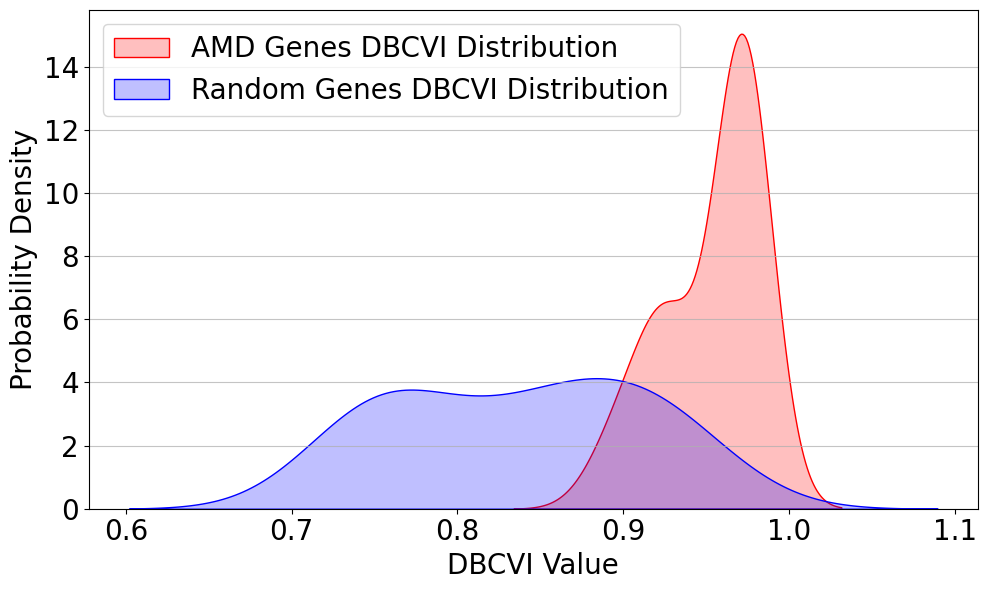

In [6]:
# Ploting the distribution on KDE
plot_kde(gene_dist, random_gene_dist)

In [7]:
# Compute the AMI between the 81 gene clusters 
compute_AMI(results_path)


Computing AMI: 100%|██████████| 100/100 [00:05<00:00, 18.89it/s]

AMI: 0.4881832098733368
